In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import image
from matplotlib import pyplot as plt
import os
import Augmentor
from PIL import Image

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


import keras
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [146]:
pokemon = pd.read_json("./data/pokemon_full.json")
pokemon.head(5)

,id,name,species,type,height,weight,abilities,stats,evolution,description,gen
0,1,Bulbasaur,Seed Pokemon,"[Grass, Poison]",2ft.4in. (0.71m),15.2 lbs (6.9 kg),"[Overgrow, Chlorophyll]","{'hp': 45, 'attack': 49, 'defense': 49, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","For some time after its birth, it grows by gai...",1
1,2,Ivysaur,Seed Pokemon,"[Grass, Poison]",3ft.3in. (0.99m),28.7 lbs (13.0 kg),"[Overgrow, Chlorophyll]","{'hp': 60, 'attack': 62, 'defense': 63, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","When the bud on its back starts swelling, a sw...",1
2,3,Venusaur,Seed Pokemon,"[Grass, Poison]",6ft.7in. (2.01m),220.5 lbs (100.0 kg),"[Overgrow, Chlorophyll]","{'hp': 80, 'attack': 82, 'defense': 83, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","After a rainy day, the flower on its back smel...",1
3,4,Charmander,Lizard Pokemon,[Fire],2ft.0in. (0.61m),18.7 lbs (8.5 kg),"[Blaze, Solar Power]","{'hp': 39, 'attack': 52, 'defense': 43, 'sp.at...","[Charmander, Charmeleon, Charizard]",The fire on the tip of its tail is a measure o...,1
4,5,Charmeleon,Flame Pokemon,[Fire],3ft.7in. (1.09m),41.9 lbs (19.0 kg),"[Blaze, Solar Power]","{'hp': 58, 'attack': 64, 'defense': 58, 'sp.at...","[Charmander, Charmeleon, Charizard]","In the rocky mountains where Charmeleon live, ...",1


In [141]:
for tt in pokemon['evolution'].values:
    print(len(tt))

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
3
2
2
2
2
2
2
0
2
2
2
2
2
2
2
2
3
3
3
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
1
1
0
2
2
2
2
2
2
1
1
1
1
1
0
0
2
2
0
0
4
4
4
4
1
2
2
2
2
0
1
0
0
0
3
3
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [147]:
def load_images(folder):
    images = []
    for a in range(1, 802):
        if a <10:
            filename = '00'+str(a)+'.png'
        elif a < 100:
            filename = '0'+str(a)+'.png'
        else:
            filename = str(a)+'.png'
    #for filename in os.listdir(folder):
        #if filename == '.DS_Store':
            #continue
        data = image.imread(folder+filename)
        images.append(data[:,:,0:4])
    return images

In [148]:
imgs = load_images('./pokemons/')

float32
(215, 215, 4)


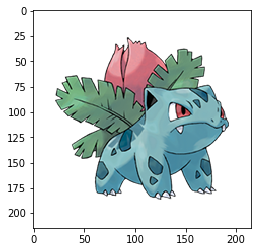

In [149]:
data = imgs[1]
print(data.dtype)
print(data.shape)
plt.imshow(data)
plt.show()

In [150]:
## Augmentation here!!
s = Augmentor.Pipeline('./pokemons/')

Initialised with 801 image(s) found.
Output directory set to ./pokemons/output.

In [24]:
s.random_distortion(probability=0.3, grid_height=3, grid_width=3, magnitude=5)
s.rotate(probability=0.4, max_left_rotation=15, max_right_rotation=15)
s.skew_tilt(probability=0.4,magnitude=1)
s.skew_corner(probability=0.5,magnitude=1)
s.flip_random(probability=0.5)
s.random_erasing(probability=0.2,rectangle_area=0.5)
s.sample(3000)

Processing <PIL.Image.Image image mode=RGBA size=215x215 at 0x1171A06D0>: 100%|██████████| 3000/3000 [00:09<00:00, 314.57 Samples/s]                  


In [ ]:
# Below are the same as Adri's model!

In [151]:
#if a pokemon has more than one type, force it to choose the first type of the two
for i in range(len(pokemon)):
    p = pokemon.iloc[i]
    t = p["type"][0]
    pokemon.at[i, 'type'] = t

In [152]:
#now we have to numerically encode the data
u = np.unique(pokemon["type"])
enc = np.array([u, np.arange(0, len(u))])
types = pd.DataFrame(data=enc.T, index=np.arange(0, len(u)), columns=["type","num"])

for i in range(len(pokemon)):
    t = pokemon.iloc[i]['type']
    pokemon.at[i, "type"] = types[types['type']==t].index.item()

In [153]:
pokemon.head(10)

,id,name,species,type,height,weight,abilities,stats,evolution,description,gen
0,1,Bulbasaur,Seed Pokemon,9,2ft.4in. (0.71m),15.2 lbs (6.9 kg),"[Overgrow, Chlorophyll]","{'hp': 45, 'attack': 49, 'defense': 49, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","For some time after its birth, it grows by gai...",1
1,2,Ivysaur,Seed Pokemon,9,3ft.3in. (0.99m),28.7 lbs (13.0 kg),"[Overgrow, Chlorophyll]","{'hp': 60, 'attack': 62, 'defense': 63, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","When the bud on its back starts swelling, a sw...",1
2,3,Venusaur,Seed Pokemon,9,6ft.7in. (2.01m),220.5 lbs (100.0 kg),"[Overgrow, Chlorophyll]","{'hp': 80, 'attack': 82, 'defense': 83, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","After a rainy day, the flower on its back smel...",1
3,4,Charmander,Lizard Pokemon,6,2ft.0in. (0.61m),18.7 lbs (8.5 kg),"[Blaze, Solar Power]","{'hp': 39, 'attack': 52, 'defense': 43, 'sp.at...","[Charmander, Charmeleon, Charizard]",The fire on the tip of its tail is a measure o...,1
4,5,Charmeleon,Flame Pokemon,6,3ft.7in. (1.09m),41.9 lbs (19.0 kg),"[Blaze, Solar Power]","{'hp': 58, 'attack': 64, 'defense': 58, 'sp.at...","[Charmander, Charmeleon, Charizard]","In the rocky mountains where Charmeleon live, ...",1
5,6,Charizard,Flame Pokemon,6,5ft.7in. (1.70m),199.5 lbs (90.5 kg),"[Blaze, Solar Power]","{'hp': 78, 'attack': 84, 'defense': 78, 'sp.at...","[Charmander, Charmeleon, Charizard]",It is said that Charizards fire burns hotter i...,1
6,7,Squirtle,Tiny Turtle Pokemon,17,1ft.8in. (0.51m),19.8 lbs (9.0 kg),"[Torrent, Rain Dish]","{'hp': 44, 'attack': 48, 'defense': 65, 'sp.at...","[Squirtle, Wartortle, Blastoise]",It shelters itself in its shell then strikes b...,1
7,8,Wartortle,Turtle Pokemon,17,3ft.3in. (0.99m),49.6 lbs (22.5 kg),"[Torrent, Rain Dish]","{'hp': 59, 'attack': 63, 'defense': 80, 'sp.at...","[Squirtle, Wartortle, Blastoise]","It is said to live 10,000 years. Its furry tai...",1
8,9,Blastoise,Shellfish Pokemon,17,5ft.3in. (1.60m),188.5 lbs (85.5 kg),"[Torrent, Rain Dish]","{'hp': 79, 'attack': 83, 'defense': 100, 'sp.a...","[Squirtle, Wartortle, Blastoise]",The jets of water it spouts from the rocket ca...,1
9,10,Caterpie,Worm Pokemon,0,1ft.0in. (0.30m),6.4 lbs (2.9 kg),"[Shield Dust, Run Away]","{'hp': 45, 'attack': 30, 'defense': 35, 'sp.at...","[Caterpie, Metapod, Butterfree]",It releases a stench from its red antenna to r...,1


In [11]:
types

,type,num
0,Bug,0
1,Dark,1
2,Dragon,2
3,Electric,3
4,Fairy,4
5,Fighting,5
6,Fire,6
7,Flying,7
8,Ghost,8
9,Grass,9


In [ ]:
#split train/test

In [154]:
temp = shuffle(range(0,801))
train_ind = temp[0:501]
test_ind = temp[501:801]

In [155]:
ys = np.array(to_categorical(pokemon["type"]))
y_train_one_hot = ys[train_ind]
y_test_one_hot = ys[test_ind]

x_train = []
x_test = []
for i in train_ind:
    x_train.append(imgs[i])
for i in test_ind:
    x_test.append(imgs[i])
    
#enlarge the training set
    for filename in os.listdir('./pokemons/output/'):
    if filename == '.DS_Store':
        continue
    t = int(filename[18:21]) - 1
    if t in train_ind:
        data = image.imread('./pokemons/output/'+filename)
        x_train.append(data[:,:,0:4])
        y_train_one_hot = np.row_stack((y_train_one_hot,ys[t]))

x_train = np.array(x_train)
x_test = np.array(x_test)


In [156]:
#now the training set has almost 3k pics
x_train.shape, x_test.shape, y_train_one_hot.shape, y_test_one_hot.shape

((2393, 215, 215, 4), (300, 215, 215, 4), (2393, 18), (300, 18))

In [159]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(215, 215, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(18, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:
hist = model.fit(x_train, y_train_one_hot, batch_size=64, epochs=10, validation_split=0.1)

Train on 2153 samples, validate on 240 samples
Epoch 1/10
2153/2153 [==============================] - 139s 65ms/step - loss: 4.2371 - accuracy: 0.0938 - val_loss: 2.8715 - val_accuracy: 0.1125
Epoch 2/10
2153/2153 [==============================] - 133s 62ms/step - loss: 2.8382 - accuracy: 0.0906 - val_loss: 2.7430 - val_accuracy: 0.1083
Epoch 3/10
2153/2153 [==============================] - 133s 62ms/step - loss: 2.6054 - accuracy: 0.1719 - val_loss: 2.6368 - val_accuracy: 0.1875
Epoch 4/10
2153/2153 [==============================] - 135s 63ms/step - loss: 2.0548 - accuracy: 0.3693 - val_loss: 2.8673 - val_accuracy: 0.1792
Epoch 5/10
2153/2153 [==============================] - 136s 63ms/step - loss: 1.0411 - accuracy: 0.6818 - val_loss: 3.7251 - val_accuracy: 0.1917
Epoch 6/10
2153/2153 [==============================] - 142s 66ms/step - loss: 0.2563 - accuracy: 0.9303 - val_loss: 5.2565 - val_accuracy: 0.1792
Epoch 7/10
2153/2153 [==============================] - 148s 69ms/step 

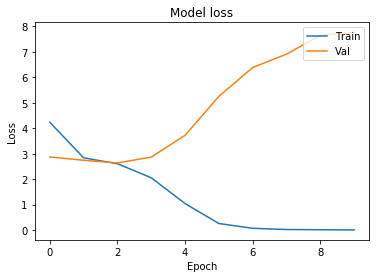

In [162]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [136]:
dat = x_test[0]
probabilities = model.predict(np.array([dat,]))
print(probabilities)
number_to_class = u
index = np.argsort(probabilities[0,:])
print(y_test_one_hot[1])

[[6.3327560e-04 1.4898093e-06 1.8884724e-07 2.6679499e-02 8.4969315e-07
  3.8534827e-07 9.6504688e-01 2.1534760e-15 1.9226538e-04 1.3236096e-05
  1.1964531e-04 3.5272283e-03 3.3422060e-05 1.1753424e-05 2.8807719e-05
  1.4206184e-04 3.6969048e-08 3.5690530e-03]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [164]:
#You can set different k's to calculate top-k accuracies
y_pred = model.predict(x_test)
k = 1
acc = 0
for i in range(len(y_test_one_hot)):
    t1 = y_test_one_hot[i].argsort()[-1]
    t2 = list(y_pred[i].argsort()[18-k:18])
    if t1 in t2:
        acc += 1
acc /= len(y_test_one_hot)
acc

0.11

In [138]:
print("Most likely class:", number_to_class[index[17]], "-- Probability:", probabilities[0,index[17]])
print("Second most likely class:", number_to_class[index[16]], "-- Probability:", probabilities[0,index[16]])
print("Third most likely class:", number_to_class[index[15]], "-- Probability:", probabilities[0,index[15]])
print("Fourth most likely class:", number_to_class[index[14]], "-- Probability:", probabilities[0,index[14]])
print("Fifth most likely class:", number_to_class[index[13]], "-- Probability:", probabilities[0,index[13]])

Most likely class: Fire -- Probability: 0.9650469
Second most likely class: Electric -- Probability: 0.0266795
Third most likely class: Water -- Probability: 0.003569053
Fourth most likely class: Ice -- Probability: 0.0035272283
Fifth most likely class: Bug -- Probability: 0.0006332756


In [19]:
print(hist.history)

{'val_loss': [20.149850845336914, 4.674663543701172, 2.9287829399108887, 2.8960535526275635, 2.890303611755371, 2.8857929706573486, 2.878385543823242, 2.8654274940490723, 2.8509104251861572, 2.8419578075408936], 'val_accuracy': [0.1666666716337204, 0.02976190485060215, 0.0595238097012043, 0.0714285746216774, 0.0773809552192688, 0.0714285746216774, 0.0714285746216774, 0.0595238097012043, 0.0773809552192688, 0.0833333358168602], 'loss': [26.20442853655134, 16.428960371990595, 3.9027322165820064, 2.8749679059398416, 2.863938127245222, 2.85332837883307, 2.8318137635990066, 2.784578274707405, 2.686404038448723, 2.5239201613834927], 'accuracy': [0.091836736, 0.08418367, 0.0867347, 0.096938774, 0.17091836, 0.17602041, 0.19132653, 0.18622449, 0.18367347, 0.16071428]}


In [0]:
u = np.unique(pokemon["type"])
enc = np.array([u, np.arange(0, len(u))])
types = pd.DataFrame(data=enc.T, index=np.arange(0, len(u)), columns=["type","num"])

print(types)
print(types[types['type']=='Dragon'].index.item())
types[types['type']==t].index.item()